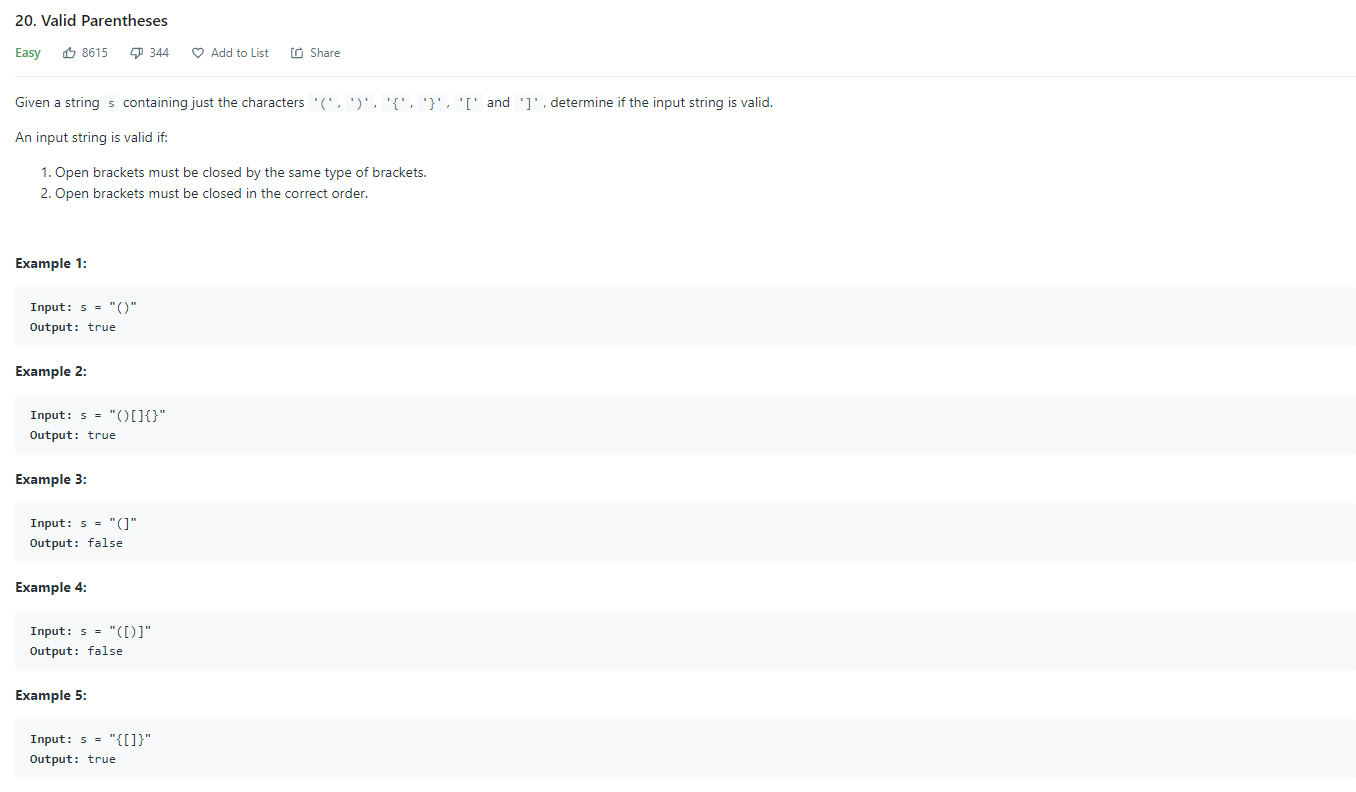

## `Stack` Review
- 스택은 가장 나중에 들어온 자료가 가장 먼저 처리되는 **`LIFO(Last-In-First-Out)`** 자료구조이다.
- Python에서는 push = **`append`**
![image.png](https://user-images.githubusercontent.com/83874157/130057780-0b150b5f-3067-4791-b5ea-43965b8ca7d2.png)

- **leetCode20 : Valid Parenthese 문제에 적용 ▼**
> 1. input **`s`** 를 반복문으로 탐색<br><br> 
> 2. **`s`**의 원소가 여는괄호인지 **`parentheses dictionary`**로 확인  <br><br>
> 3. 여는 괄호일 경우 **`stack`** 리스트에 추가<br><br>
> 4. 여는 괄호를 모두 추가한 후 마지막으로 들어온 괄호부터 **`pop`** 으로 괄호 일치여부 확인

In [55]:
# annotation

s = "["
s = "()[]{}[](){}"
s = "}{{}}{"
s = "[()]"

class Solution:
    def isValid(self, s: str) -> bool:
        if len(s) % 2 != 0:        # 정상적으로 열고 닫힌 괄호의 길이는 항상 짝수이므로 s의 길이가 홀수일 경우 False
            return False        
        
        parentheses = { '(' : ')', '{' : '}', '[' : ']' }        # key : open / value : close
        r_parentheses = dict(map(reversed, parentheses.items())) # key : close / value : open
        stack = []
        
        for par in s:
            if par in parentheses: # key value로 여는 괄호 탐색, 닫는 괄호는 values에 포함되어 stack에 쌓이지 않음
                stack.append(par)  # 여는 괄호만 stack에 담기
            
            elif len(stack) == 0:  # 괄호의 순서가 잘못되어서 stack에 쌓이지 않았을 시 False
                return False
            
            elif r_parentheses[par] != stack.pop():  # value값에 있는 닫는 괄호가 인덱싱이 안돼서 r_parentheses 생성
                return False       # stack에 쌓인 여는괄호와 닫는 괄호와 비교
            
        return len(stack) == 0
    
print(Solution().isValid(s))

True


In [55]:
# no annotation

s = "["
s = "()[]{}[](){}"
s = "}{{}}{"
s = "[()]"

class Solution:
    def isValid(self, s: str) -> bool:
        if len(s) % 2 != 0:        
            return False        
        
        parentheses = { '(' : ')', '{' : '}', '[' : ']' }        
        r_parentheses = dict(map(reversed, parentheses.items())) 
        stack = []
        
        for par in s:
            if par in parentheses: 
                stack.append(par)  
            
            elif len(stack) == 0: 
                return False
            
            elif r_parentheses[par] != stack.pop(): 
                return False       
            
        return len(stack) == 0
    
print(Solution().isValid(s))

True


In [54]:
# test

parentheses = {
               "(" : ")",   # open  =>  keys
               "{" : "}",   # close =>  values
               "[" : "]"
              }
    
reversed_par = dict(map(reversed, parentheses.items()))
reversed_par

{')': '(', '}': '{', ']': '['}

# Failed ▼

In [42]:
s = "{[()]}"
s = "()[]{}[](){}"
s = "}{{}}{"

class Solution:
    def isValid(self, s: str) -> bool:
        parentheses = { "(": ")",
                        ")": "(",
                        "{": "}",
                        "}": "{",
                        "[": "]",
                        "]": "[" }        
        
        if s[0] == parentheses[s[-1]]:
            s_div = int(len(s)/2)
            par = [parentheses[p] for p in s[:s_div][::-1]]
            par = "".join(par)
        
            return s[s_div:] == par
            
        else:
            odd = ""
            eve = ""
            for idx, p in enumerate(s):
                if idx % 2 == 1:
                    odd += p
                else:
                    eve += parentheses[p]
            
            return odd == eve
        
    
print(Solution().isValid(s))

True
